In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn
%matplotlib inline
%pylab inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

Populating the interactive namespace from numpy and matplotlib


In [2]:
sc_min = pd.read_csv('sc_min.csv', header=0, sep=',')
sc_max = pd.read_csv('sc_max.csv', header=0, sep=',')
sc_mean = pd.read_csv('sc_mean.csv', header=0, sep=',')

In [11]:
# Adding features to improve the quality of the model.
def add1(data):
    X = data.drop('critical_temp', 1)
    X = X.drop('material', 1)
    X0 = X.iloc[:, [0]]
    y = data['critical_temp']
    train_data, test_data, train_labels, test_labels = train_test_split(X0, y, test_size = 0.3,random_state = 0)
    rfst = RandomForestRegressor(max_depth=22, random_state=0, n_estimators=119, min_impurity_decrease=0.0007)
    rfst.fit(train_data, train_labels)
    r20=metrics.r2_score(test_labels,rfst.predict(test_data))
    print(r20)
    
    for i in range(1,80):
        X0[X.columns[i]] = X.iloc[:, [i]]        
        train_data, test_data, train_labels, test_labels = train_test_split(X0, y, test_size = 0.3,random_state = 0)
        rfst = RandomForestRegressor(max_depth=22, random_state=0, n_estimators=119, min_impurity_decrease=0.0007)
        rfst.fit(train_data, train_labels)
        r21=metrics.r2_score(test_labels,rfst.predict(test_data))

        if r21>=r20:
            r20 = r21
            #X0 = X0[X.columns[i]]
        else:
            X0 = X0.drop(X.columns[i],1) 
        print(r20)    
    return(X0)

In [12]:
def length(data):    
    k=0
    for i in data.columns:
        k=k+1
    return k   

In [13]:
# Adding features to improve the quality of the model.
def add2(X00):
    X = sc_min.drop('critical_temp', 1)
    X = X.drop('material', 1)
    columns = X00.columns
    X = X.drop(columns, 1)
    X0 = X00
    y = data['critical_temp']
    train_data, test_data, train_labels, test_labels = train_test_split(X0, y, test_size = 0.3,random_state = 0)
    rfst = RandomForestRegressor(max_depth=22, random_state=0, n_estimators=119, min_impurity_decrease=0.0007)
    rfst.fit(train_data, train_labels)
    r20=metrics.r2_score(test_labels,rfst.predict(test_data))
    print(r20)
    
    for i in range(1,length(X)):
        X0[X.columns[i]] = X.iloc[:, [i]]        
        train_data, test_data, train_labels, test_labels = train_test_split(X0, y, test_size = 0.3,random_state = 0)
        rfst = RandomForestRegressor(max_depth=22, random_state=0, n_estimators=119, min_impurity_decrease=0.0007)
        rfst.fit(train_data, train_labels)
        r21=metrics.r2_score(test_labels,rfst.predict(test_data))

        if r21>=r20:
            r20 = r21
            #X0 = X0[X.columns[i]]
        else:
            X0 = X0.drop(X.columns[i],1) 
        print(r20)    
    return(X0)

In [14]:
# Removing features to improve the quality of the model.
def delete(X00):
    X = X00
    y = data['critical_temp']
    train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.3,random_state = 0)
    rfst = RandomForestRegressor(max_depth=22, random_state=0, n_estimators=119, min_impurity_decrease=0.0007)
    rfst.fit(train_data, train_labels)
    r20=metrics.r2_score(test_labels,rfst.predict(test_data))
    X0 = X
    for i in X0.columns:
        X1 = X.drop(i, 1)
        train_data, test_data, train_labels, test_labels = train_test_split(X1, y, test_size = 0.3,random_state = 0)
        rfst = RandomForestRegressor(max_depth=22, random_state=0, n_estimators=119, min_impurity_decrease=0.0007)
        rfst.fit(train_data, train_labels)
        r21=metrics.r2_score(test_labels,rfst.predict(test_data))
        if r21>=r20:
            X = X1
            r20 = r21
        print(r20)    
    return(X) 

In [18]:
def add_del(data):
    step1 = add1(data)
    step2 = delete(step1)
    step3 = add2(step2)
    step4 = delete(step3)
    step5 = add2(step4)
    return(step5.columns)

In [16]:
data = sc_min
add_del(data)

0.41331291977952433


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


0.7689606931084929
0.7995901076446984
0.8374910875824675
0.8430718952758308
0.8541882870972182
0.866991560956407
0.8801394378320417
0.8805009847149748
0.8847869838751273
0.8847869838751273
0.885788001506155
0.8883646316686292
0.8883646316686292
0.8890171151886894
0.8890171151886894
0.8890171151886894
0.8957995260050551
0.8957995260050551
0.8957995260050551
0.8973676831359274
0.8973676831359274
0.899382094945854
0.899382094945854
0.899382094945854
0.9017693543242922
0.9017693543242922
0.9017693543242922
0.902344198796919
0.902344198796919
0.9024512080572328
0.9024512080572328
0.9035343301707446
0.9042832779321762
0.9042832779321762
0.9050824710208979
0.9056940563152378
0.9056940563152378
0.9056940563152378
0.9056940563152378
0.9056940563152378
0.9070713808457235
0.9070713808457235
0.9070713808457235
0.9072514296486502
0.9072514296486502
0.9072514296486502
0.9072555677444682
0.9078617265311375
0.9078617265311375
0.909503516101467
0.9096005011236928
0.9096005011236928
0.9096005011236928
0

0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679455959
0.9152073679

Index([u'wtd_mean_atomic_mass', u'gmean_atomic_mass', u'wtd_gmean_atomic_mass',
       u'entropy_atomic_mass', u'wtd_entropy_atomic_mass',
       u'range_atomic_mass', u'std_atomic_mass', u'mean_fie', u'wtd_mean_fie',
       u'range_fie', u'wtd_std_fie', u'wtd_mean_atomic_radius',
       u'entropy_atomic_radius', u'wtd_std_atomic_radius', u'wtd_mean_Density',
       u'gmean_Density', u'entropy_Density', u'wtd_entropy_Density',
       u'wtd_gmean_ElectronAffinity', u'range_ElectronAffinity',
       u'wtd_range_ElectronAffinity', u'wtd_std_ElectronAffinity',
       u'mean_FusionHeat', u'entropy_FusionHeat', u'wtd_entropy_FusionHeat',
       u'range_FusionHeat', u'entropy_ThermalConductivity',
       u'wtd_entropy_ThermalConductivity', u'std_Valence', u'gmean_fie',
       u'wtd_range_fie', u'mean_atomic_radius', u'wtd_entropy_atomic_radius',
       u'wtd_mean_ElectronAffinity', u'wtd_entropy_ElectronAffinity',
       u'gmean_FusionHeat', u'entropy_Valence', u'mean_atomic_mass',
       u'g

In [21]:
sc11 = sc_min
columns = ['wtd_mean_atomic_mass', 'gmean_atomic_mass', 'wtd_gmean_atomic_mass',
       'entropy_atomic_mass', 'wtd_entropy_atomic_mass',
       'range_atomic_mass', 'std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'range_fie', 'wtd_std_fie', 'wtd_mean_atomic_radius',
       'entropy_atomic_radius', 'wtd_std_atomic_radius', 'wtd_mean_Density',
       'gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'wtd_gmean_ElectronAffinity', 'range_ElectronAffinity',
       'wtd_range_ElectronAffinity', 'wtd_std_ElectronAffinity',
       'mean_FusionHeat', 'entropy_FusionHeat', 'wtd_entropy_FusionHeat',
       'range_FusionHeat', 'entropy_ThermalConductivity',
       'wtd_entropy_ThermalConductivity', 'std_Valence', 'gmean_fie',
       'wtd_range_fie', 'mean_atomic_radius', 'wtd_entropy_atomic_radius',
       'wtd_mean_ElectronAffinity', 'wtd_entropy_ElectronAffinity',
       'gmean_FusionHeat', 'entropy_Valence', 'mean_atomic_mass',
       'gmean_ElectronAffinity']
X = sc11[columns]
y = sc11['critical_temp']
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.3,random_state = 0)
rfst = RandomForestRegressor(max_depth=22, random_state=0, n_estimators=119, min_impurity_decrease=0.0007)
rfst.fit(train_data, train_labels)
r20=metrics.r2_score(test_labels,rfst.predict(test_data))
r21=metrics.mean_absolute_error(test_labels,rfst.predict(test_data))
r22=metrics.mean_squared_error(test_labels,rfst.predict(test_data))
print(r20,r21,r22)

(0.9152073679455959, 5.637811654931385, 92.69405265512142)


In [19]:
data = sc_mean
add_del(data)

0.4137501116399227


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


0.7765129551789598
0.810058130583454
0.8441694021162804
0.8492269897559729
0.8643804231066731
0.8768780009302848
0.8899110975702202
0.8910547428413755
0.8928848739279293
0.8928848739279293
0.8953196523049582
0.8972801820350209
0.8978737225905411
0.8982359211640336
0.8982359211640336
0.8982768595131935
0.9052005144841866
0.9052005144841866
0.9061779167323055
0.9065200100065179
0.9065200100065179
0.9077476971552765
0.9079649038168058
0.9079649038168058
0.9093048994536297
0.9093048994536297
0.9094924313693892
0.9094924313693892
0.9094924313693892
0.9102461565340586
0.9102461565340586
0.9111472215013257
0.9111472215013257
0.9111472215013257
0.9118168201091289
0.9118168201091289
0.9120946786279973
0.9132510255367191
0.9132814075417469
0.9149674091976765
0.9158234751177324
0.9160939812540612
0.9175647883149474
0.9210945228437639
0.9210945228437639
0.9210945228437639
0.9210945228437639
0.9210945228437639
0.9210945228437639
0.9218994539377828
0.9219183351898637
0.9219955925594732
0.92199559255

Index([u'mean_atomic_mass', u'gmean_atomic_mass', u'wtd_gmean_atomic_mass',
       u'entropy_atomic_mass', u'wtd_entropy_atomic_mass',
       u'range_atomic_mass', u'wtd_range_atomic_mass', u'std_atomic_mass',
       u'wtd_mean_fie', u'gmean_fie', u'wtd_gmean_fie', u'wtd_entropy_fie',
       u'range_fie', u'std_fie', u'wtd_std_fie', u'wtd_mean_atomic_radius',
       u'gmean_atomic_radius', u'entropy_atomic_radius',
       u'range_atomic_radius', u'wtd_std_atomic_radius', u'wtd_mean_Density',
       u'entropy_Density', u'range_Density', u'wtd_range_Density',
       u'std_Density', u'wtd_std_Density', u'mean_ElectronAffinity',
       u'wtd_mean_ElectronAffinity', u'gmean_ElectronAffinity',
       u'wtd_gmean_ElectronAffinity', u'wtd_std_ElectronAffinity',
       u'wtd_mean_FusionHeat', u'wtd_gmean_FusionHeat', u'range_FusionHeat',
       u'gmean_ThermalConductivity', u'entropy_ThermalConductivity',
       u'entropy_Valence', u'std_atomic_radius'],
      dtype='object')

In [23]:
sc11 = sc_mean
columns = ['mean_atomic_mass', 'gmean_atomic_mass', 'wtd_gmean_atomic_mass',
       'entropy_atomic_mass', 'wtd_entropy_atomic_mass',
       'range_atomic_mass', 'wtd_range_atomic_mass', 'std_atomic_mass',
       'wtd_mean_fie', 'gmean_fie', 'wtd_gmean_fie', 'wtd_entropy_fie',
       'range_fie', 'std_fie', 'wtd_std_fie', 'wtd_mean_atomic_radius',
       'gmean_atomic_radius', 'entropy_atomic_radius',
       'range_atomic_radius', 'wtd_std_atomic_radius', 'wtd_mean_Density',
       'entropy_Density', 'range_Density', 'wtd_range_Density',
       'std_Density', 'wtd_std_Density', 'mean_ElectronAffinity',
       'wtd_mean_ElectronAffinity', 'gmean_ElectronAffinity',
       'wtd_gmean_ElectronAffinity', 'wtd_std_ElectronAffinity',
       'wtd_mean_FusionHeat', 'wtd_gmean_FusionHeat', 'range_FusionHeat',
       'gmean_ThermalConductivity', 'entropy_ThermalConductivity',
       'entropy_Valence', 'std_atomic_radius']
X = sc11[columns]
y = sc11['critical_temp']
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.3,random_state = 0)
rfst = RandomForestRegressor(max_depth=22, random_state=0, n_estimators=119, min_impurity_decrease=0.0007)
rfst.fit(train_data, train_labels)
r20=metrics.r2_score(test_labels,rfst.predict(test_data))
r21=metrics.mean_absolute_error(test_labels,rfst.predict(test_data))
r22=metrics.mean_squared_error(test_labels,rfst.predict(test_data))
print(r20,r21,r22)

(0.9239527005388997, 5.334560661847965, 84.55481957752389)


In [20]:
data = sc_max
add_del(data)

0.4109416836877111


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


0.7740437568794719
0.8062943913237645
0.8393577449364354
0.8450858982154902
0.861696210220857
0.8721706480098076
0.8871593785524735
0.8872945856787093
0.8894201067462418
0.8894201067462418
0.8922883549999127
0.8940450525722373
0.8947754644256491
0.8947754644256491
0.8949812062035123
0.8949812062035123
0.9028691020089629
0.9028691020089629
0.9028691020089629
0.9028691020089629
0.9028691020089629
0.9040761302863214
0.9040761302863214
0.9040761302863214
0.9051400675452426
0.9051400675452426
0.9051400675452426
0.9051400675452426
0.9051400675452426
0.9062018438472805
0.9068432005319825
0.9081913030520866
0.9081913030520866
0.9083182418985475
0.9083182418985475
0.9083182418985475
0.9083182418985475
0.9085422853563441
0.9085422853563441
0.9100393278775563
0.9102135792127656
0.9103297937412141
0.9113122764064354
0.9114222510843224
0.9114222510843224
0.9126125256122877
0.9132399712660023
0.9132399712660023
0.9132399712660023
0.9157550407581493
0.9164860801653741
0.9168097737594065
0.91680977375

Index([u'mean_atomic_mass', u'wtd_mean_atomic_mass', u'gmean_atomic_mass',
       u'wtd_gmean_atomic_mass', u'wtd_entropy_atomic_mass',
       u'range_atomic_mass', u'wtd_range_atomic_mass', u'std_atomic_mass',
       u'mean_fie', u'wtd_mean_fie', u'gmean_fie', u'entropy_fie',
       u'range_fie', u'wtd_mean_atomic_radius', u'wtd_std_atomic_radius',
       u'mean_Density', u'wtd_gmean_Density', u'wtd_range_Density',
       u'wtd_std_Density', u'mean_ElectronAffinity',
       u'wtd_mean_ElectronAffinity', u'wtd_gmean_ElectronAffinity',
       u'wtd_entropy_ElectronAffinity', u'range_ElectronAffinity',
       u'wtd_std_ElectronAffinity', u'mean_FusionHeat', u'wtd_mean_FusionHeat',
       u'entropy_FusionHeat', u'entropy_Valence', u'range_Valence',
       u'std_Valence', u'std_fie', u'wtd_std_fie', u'gmean_atomic_radius',
       u'wtd_entropy_FusionHeat', u'mean_atomic_radius',
       u'wtd_range_atomic_radius', u'std_FusionHeat'],
      dtype='object')

In [25]:
sc11 = sc_max
columns = ['mean_atomic_mass', 'wtd_mean_atomic_mass', 'gmean_atomic_mass',
       'wtd_gmean_atomic_mass', 'wtd_entropy_atomic_mass',
       'range_atomic_mass', 'wtd_range_atomic_mass', 'std_atomic_mass',
       'mean_fie', 'wtd_mean_fie', 'gmean_fie', 'entropy_fie',
       'range_fie', 'wtd_mean_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_gmean_Density', 'wtd_range_Density',
       'wtd_std_Density', 'mean_ElectronAffinity',
       'wtd_mean_ElectronAffinity', 'wtd_gmean_ElectronAffinity',
       'wtd_entropy_ElectronAffinity', 'range_ElectronAffinity',
       'wtd_std_ElectronAffinity', 'mean_FusionHeat', 'wtd_mean_FusionHeat',
       'entropy_FusionHeat', 'entropy_Valence', 'range_Valence',
       'std_Valence', 'std_fie', 'wtd_std_fie', 'gmean_atomic_radius',
       'wtd_entropy_FusionHeat', 'mean_atomic_radius',
       'wtd_range_atomic_radius', 'std_FusionHeat']
X = sc11[columns]
y = sc11['critical_temp']
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.3,random_state = 0)
rfst = RandomForestRegressor(max_depth=22, random_state=0, n_estimators=119, min_impurity_decrease=0.0007)
rfst.fit(train_data, train_labels)
r20=metrics.r2_score(test_labels,rfst.predict(test_data))
r21=metrics.mean_absolute_error(test_labels,rfst.predict(test_data))
r22=metrics.mean_squared_error(test_labels,rfst.predict(test_data))
print(r20,r21,r22)

(0.920006904918301, 5.431282258615371, 91.08422844506372)


In [26]:
X

,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,mean_fie,wtd_mean_fie,...,entropy_Valence,range_Valence,std_Valence,std_fie,wtd_std_fie,gmean_atomic_radius,wtd_entropy_FusionHeat,mean_atomic_radius,wtd_range_atomic_radius,std_FusionHeat
0,88.944468,57.862692,66.361592,36.116612,1.062396,122.906070,31.794921,51.968828,775.425000,1010.268571,...,1.368922,1,0.433013,323.811808,355.562967,136.126003,0.994998,160.250000,42.914286,4.599064
1,92.729214,58.518416,73.132787,36.396602,1.057755,122.906070,36.161939,47.094633,766.440000,1010.612857,...,1.557113,2,0.632456,290.183029,354.963511,141.465215,1.073094,161.200000,50.571429,4.473363
2,88.944468,57.885242,66.361592,36.122509,0.975980,122.906070,35.741099,51.968828,775.425000,1010.820000,...,1.368922,1,0.433013,323.811808,354.804183,136.126003,0.927479,160.250000,49.314286,4.599064
3,88.944468,57.873967,66.361592,36.119560,1.022291,122.906070,33.768010,51.968828,775.425000,1010.544286,...,1.368922,1,0.433013,323.811808,355.183884,136.126003,0.964031,160.250000,46.114286,4.599064
4,88.944468,57.840143,66.361592,36.110716,1.129224,122.906070,27.848743,51.968828,775.425000,1009.717143,...,1.368922,1,0.433013,323.811808,356.319281,136.126003,1.044970,160.250000,36.514286,4.599064
5,88.944468,57.795044,66.361592,36.098926,1.225203,122.906070,20.687458,51.968828,775.425000,1008.614286,...,1.368922,1,0.433013,323.811808,357.824566,136.126003,1.111850,160.250000,23.714286,4.599064
6,88.944468,57.682296,66.361592,36.069470,1.316857,122.906070,10.765639,51.968828,775.425000,1005.857143,...,1.368922,1,0.433013,323.811808,361.545642,136.126003,1.156821,160.250000,15.428571,4.599064
7,76.517718,57.175142,59.310096,35.891368,0.943560,122.906070,36.451199,44.289459,787.050000,1011.484286,...,1.368922,1,0.433013,314.505966,353.894217,131.302197,0.927479,151.750000,49.800000,4.599064
8,76.517718,56.808817,59.310096,35.773432,0.981880,122.906070,34.833160,44.289459,787.050000,1011.540714,...,1.368922,1,0.433013,314.505966,353.819831,131.302197,0.964031,151.750000,46.842857,4.599064
9,76.517718,56.442492,59.310096,35.655884,1.016495,122.906070,33.215121,44.289459,787.050000,1011.597143,...,1.368922,1,0.433013,314.505966,353.745421,131.302197,0.994998,151.750000,43.885714,4.599064


In [27]:
data = sc_min.query("number_of_elements in [1,9]")
add_del(data)

C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


0.8777462773448896
0.8801006310483732
0.8848180242780802
0.8937312384691753
0.9029577066589928


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


0.9029577066589928


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykerne

0.9145325377595521
0.9145325377595543
0.9156721742977996
0.9156721742977998
0.9156721742977998
0.9156721742977998
0.9156721742977998
0.9156721742977998
0.9156721742977998
0.9156721742978
0.9166908976741639
0.9166908976741648
0.9168079195877464
0.9168079195877467
0.9168079195877467
0.9168655513971298
0.9168655513971298
0.9168655513971298
0.9168655513971298
0.9168655513971307
0.9168655513971307
0.9168655513971307
0.9168655513971307
0.9168655513971307
0.9168655513971307
0.9168655513971307
0.9168655513971307
0.9168655513971307
0.9168655513971307
0.9168655513971307
0.9168655513971307
0.9168655513971307
0.9168655513971307
0.9168655513971307
0.9168655513971307
0.9168834349187732
0.9168834349187732
0.9168834349187732
0.9168834349187732
0.9168834349187732
0.9168834349187732
0.9168834349187732
0.9168834349187732
0.9168834349187732
0.9168834349187732
0.9168834349187732
0.9168834349187732
0.9168834349187732
0.9168834349187732
0.9168834349187732


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykerne

0.9168834349187732
0.9168834349187732
0.9168834349187732
0.9168834349187732
0.9168834349187732
0.9168834349187732
0.9168834349187732
0.9168834349187732
0.9168834349187732
0.9168834349187732
0.9168834349187732
0.9168834349187732
0.9168834349187732
0.9168834349187732
0.9168834349187732
0.9168834349187732
0.9168834349187732
0.9168834349187732
0.9168834349187732
0.9168834349187732
0.9168834349187732
0.9168834349187733
0.9168834349187733
0.9168834349187733
0.9168834349187733
0.9168834349187733
0.9168956682438443
0.9168956682438443
0.9168956682438443
0.9168956682438443
0.9168956682438443
0.9168956682438443
0.9168956682438443
0.9168956682438443
0.9168956682438443
0.9168956682438443
0.9168956682438443
0.9168956682438443
0.9168956682438445
0.9169247797631885
0.9169247797631885
0.9169247797631885
0.9169247797631885
0.9169247797631885
0.9169247797631885
0.9169247797631885
0.9169247797631885
0.9169247797631885


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted t

0.9169247797631885
0.9169247797631885
0.9169247797631885


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.9169247797631885
0.9169247797631885
0.9169247797631885
0.9169247797631885
0.9169247797631885
0.9169247797631885
0.9169247797631885
0.9169247797631885
0.9169247797631885
0.9169247797631885
0.9169247797631885
0.9169247797631885
0.9169247797631885
0.9169247797631885
0.9169247797631885
0.9169247797631885
0.9169247797631885
0.9169247797631885
0.9169247797631885
0.9169247797631885
0.9169247797631885
0.9169247797631885
0.9169247797631885
0.9169247797631885
0.9169247797631886
0.9169247797631886
0.9169247797631886
0.9169247797631886
0.9169247797631889
0.9169247797631889
0.9169247797631889
0.9169247797631889
0.9169247797631889
0.9169247797631889
0.9169247797631889
0.9169247797631889
0.9169247797631889
0.9169247797631889
0.9169247797631889
0.9169247797631889
0.9169247797631889
0.9169247797631889
0.9169247797631889
0.9169247797631889
0.9169247797631889
0.9169247797631889

C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co


0.9169247797631889
0.9169247797631889


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.9169247797631889
0.9169247797631889
0.9169247797631889
0.9169247797631889
0.9169247797631889
0.9169247797631889
0.9169247797631889
0.9169247797631889
0.9169247797631889
0.9169247797631889
0.9169247797631889
0.9169247797631889
0.9169247797631889
0.9169247797631889
0.9169247797631889
0.9169247797631889
0.9169247797631889
0.9169247797631889
0.9169247797631891
0.9169247797631891
0.9169247797631891
0.9169247797631891
0.9169247797631891
0.9169247797631891
0.9169247797631891
0.9169247797631891
0.9169247797631891
0.9169247797631891
0.9169247797631891
0.9169247797631891
0.9169247797631891
0.9169247797631891
0.9169247797631891
0.9169247797631891
0.9169247797631891
0.9169247797631891
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the 

0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893
0.9169247797631893


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

Index([u'number_of_elements', u'mean_atomic_mass', u'gmean_atomic_mass',
       u'wtd_gmean_atomic_mass', u'wtd_entropy_atomic_mass',
       u'wtd_range_atomic_mass', u'std_atomic_mass', u'wtd_entropy_fie',
       u'wtd_range_fie', u'std_fie', u'entropy_atomic_radius',
       u'mean_ElectronAffinity', u'range_Valence', u'entropy_atomic_mass',
       u'range_atomic_radius', u'entropy_ElectronAffinity',
       u'std_ElectronAffinity', u'entropy_fie'],
      dtype='object')

In [28]:
data = sc_min.query("number_of_elements in [2,7,9]")
add_del(data)

C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  


0.7439415529435998
0.7439415529435998
0.7445321233612463
0.7445321233612463
0.7445321233612463
0.7473334401182463
0.7479587944816777
0.7480538428070402
0.748177835937009
0.7590004213890311
0.7656200680253225
0.7656200680253225
0.7661289058325585
0.7669293293268247
0.7669293293268247
0.7691876127271465
0.7699811295103411
0.770384056713266
0.770384056713266
0.776783625323509
0.7769574635578685


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14

0.7773013285993411
0.7773013285993411
0.7780195217328052
0.7780195217328052
0.7788910599760303
0.7788910599760303
0.7803510398424
0.7804898587054757
0.7887136257623228


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


0.7887136257623228
0.788818386399757
0.7889149150269078
0.7913636233410505
0.7917187786236681
0.797945141649529
0.8081624643586621
0.8081624643586621
0.8084452520237424
0.8084452520237424
0.8084452520237424
0.808608512496631
0.8087251126593624
0.8098140798414996
0.8139166322517927
0.8139166322517927
0.8139166322517927
0.8142136490510692
0.8153800219751792
0.8153800219751792
0.8172487468839621
0.8178578189185248
0.818444336955144


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykerne

0.8190583241741567
0.819258401810288
0.8192591033410128
0.8192591033410128
0.8192591033410128
0.8192591033410128
0.8192591033410128
0.8192591033410128
0.8193023567091013
0.8196299420587698
0.823137820778086
0.8246494799874391
0.8327864325165619
0.8432072325226713
0.8444950595866549
0.8469250068290808


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykerne

0.8469250068290808
0.8469250068290808
0.8469250068290808
0.8474220086627399
0.8474825333666749
0.8494806560042893
0.8511641810330816
0.8517745769019361
0.8517745769019361


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykerne

0.8520672187526438
0.8520672187526438
0.8522361657796678


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()


0.8522361657796678
0.8522361657796678
0.8522361657796678
0.8522361657796678
0.8522361657796678
0.8522361657796678
0.8522366864940434
0.8523776534835126
0.8523776534835126
0.8523776534835126


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8523776534835126
0.8523776534835126
0.8523776534835126


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()


0.8523776534835126
0.8523776534835126
0.8523776534835126
0.8524392383433965
0.8524392383433965
0.852486414090627
0.852486414090627
0.852486414090627
0.852486414090627
0.852486414090627
0.852486414090627
0.852486414090627


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.852486414090627
0.852486414090627
0.852486414090627
0.852486414090627
0.852486414090627
0.852486414090627
0.852486414090627
0.8525858804689521
0.8525858804689521
0.8525858804689521
0.8525881105008181
0.8525881105008181
0.8526293800493301


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8526646483201941
0.8530508492532309
0.8530508492532309
0.8530508492532309
0.8530508492532309
0.8530763217829489
0.8530763217829489
0.8530763217829489
0.8530763217829489
0.8530763217829489
0.8531179745239632
0.8531179745239632
0.8531179745239632
0.8531179745239632
0.8531179745239632


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8531179745239632
0.8556876399011858
0.8557507652473576
0.8557620817943357
0.8557620817943357
0.8582024904269581
0.8582024904269581
0.8582024904269581


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.8582024904269581
0.8582895595052321
0.8585334176152516
0.8589754879606706


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()


0.8597423393756056
0.8597430334914853
0.8599763357353741
0.8605397138645277
0.8605430436626362
0.8605430436626362
0.8605860766645796
0.8605860766645796


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.8605860766645796
0.8612714021886945
0.8612714021886945
0.8612714021886945


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()


0.8612714021886945
0.861491215499572
0.861491215499572
0.861491215499572
0.861491215499572
0.861491215499572
0.861491215499572


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.861491215499572
0.861491215499572
0.861491215499572
0.861491215499572


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()


0.861491215499572
0.8614937688710205
0.8615232676961188
0.8622236217290564
0.8622236217290564
0.8622236217290564
0.8622236217290564


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: 

0.8622236217290564
0.8622236217290564
0.8622236217290564
0.8622236217290564
0.8622236217290564


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()


0.8622236217290564
0.8623866953021406
0.8623866953021406
0.8623866953021406
0.8623866953021406
0.8623866953021406


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8623866953021406
0.8623866953021406
0.8624042872748796
0.8624042872748796
0.862407846654266


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()


0.862407846654266
0.862407846654266
0.862407846654266
0.862407846654266
0.862407846654266
0.862407846654266
0.862407846654266
0.862407846654266
0.8624166732166858


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8624166732166858
0.8626462577626455
0.8626462577626455
0.8626462577626455
0.8626462577626455


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8626462577626455
0.8626462577626455
0.8626462577626455
0.8626462577626455
0.8626462577626455
0.8626462577626455
0.8626462577626455
0.8626462577626455
0.8626462577626455


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8626462577626455
0.8626462577626455
0.8626462577626455
0.8626462577626455
0.8626462577626455


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8626462577626455
0.8626462577626455
0.8626462577626455
0.8626472395823632
0.8626472395823632
0.8626472395823632
0.8626472395823632
0.8626472395823632
0.8626472395823632


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8626472395823632
0.8626987051280728
0.8626987051280728
0.8626987051280728


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()


0.8626987051280728
0.8626987051280728
0.8626987051280728
0.8626987051280728
0.8627206408477472
0.8627206408477472
0.8627206408477472


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.8627252533033859
0.8627416657878433
0.8627416657878433
0.8627416657878433


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()


0.8627416657878433
0.8627416657878433
0.8627416657878433
0.8627416657878433
0.8627416657878433
0.8627604226056831
0.8627626153266624
0.8627626153266624
0.8627626153266624
0.862853715271897
0.862853715271897


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.862853715271897
0.862853715271897
0.862853715271897
0.862853715271897
0.8628667429472373
0.8628667429472373
0.8628667429472373
0.8628667429472373
0.8628667429472373
0.8628667429472373


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 

0.862891442042244
0.862891442042244
0.862891442042244
0.862891442042244
0.862891442042244
0.862891442042244
0.862891442042244
0.862891442042244
0.862891442042244
0.862891442042244
0.862891442042244
0.862891442042244


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.862891442042244
0.8629264864908078
0.8629264864908078
0.8629264864908078
0.8629264864908078
0.8629264864908078
0.8629264864908078
0.8629264864908078
0.8629264864908078
0.8629264864908078
0.8629264864908078


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8629264864908078
0.8629264864908078
0.8629264864908078
0.8629264864908078
0.8629264864908078
0.8629264864908078
0.8629264864908078
0.8629264864908078
0.8629264864908078
0.8629264864908078


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8629264864908078
0.8629264864908078
0.8629264864908078
0.8629264864908078
0.8629264864908078
0.8629264864908078
0.8629264864908078
0.8629264864908078
0.8629264864908078
0.8629264864908078
0.8629264864908078
0.8629264864908078
0.8629264864908078


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8629264864908078
0.8629264864908078
0.8629264864908078
0.8629292047531072
0.8629292047531072
0.8629292047531072
0.8629292047531072
0.8629292047531072
0.8629292047531072
0.86293690982962
0.86293690982962


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.86293690982962
0.86293690982962
0.86293690982962
0.86293690982962
0.8629376227059777
0.8629376227059777
0.8629376227059777
0.8629376227059777
0.8629376227059777
0.8629376227059777
0.8629376227059777


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.8629376227059777
0.8629376227059777
0.8629376227059777
0.8629376227059777
0.8629376227059777
0.8629376227059777
0.8629376227059777
0.8629376227059777
0.8629376227059777
0.8629376227059777
0.8629376227059777


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.8629376227059777
0.8629376227059777
0.8629376227059777
0.8629376227059777
0.8629376227059777
0.8629376227059777
0.8629376227059777
0.8629376227059777
0.8629376227059777
0.8629840649723636
0.8629840649723636
0.8629840649723636


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.8629840649723636


Index([u'wtd_mean_atomic_mass', u'entropy_atomic_mass',
       u'wtd_entropy_atomic_mass', u'range_atomic_mass', u'std_atomic_mass',
       u'gmean_fie', u'entropy_fie', u'std_fie', u'wtd_std_fie',
       u'mean_atomic_radius', u'gmean_atomic_radius', u'range_atomic_radius',
       u'std_atomic_radius', u'wtd_mean_Density', u'wtd_gmean_Density',
       u'wtd_entropy_Density', u'wtd_range_Density', u'mean_ElectronAffinity',
       u'wtd_mean_ElectronAffinity', u'gmean_ElectronAffinity',
       u'wtd_gmean_ElectronAffinity', u'wtd_std_ElectronAffinity',
       u'gmean_FusionHeat', u'wtd_mean_ThermalConductivity',
       u'gmean_ThermalConductivity', u'wtd_gmean_ThermalConductivity',
       u'wtd_entropy_ThermalConductivity', u'range_ThermalConductivity',
       u'wtd_range_ThermalConductivity', u'wtd_mean_Valence',
       u'wtd_gmean_Valence', u'entropy_Valence', u'wtd_entropy_Valence',
       u'wtd_range_Valence', u'mean_atomic_mass', u'gmean_atomic_mass',
       u'wtd_gmean_atomic_mass

In [29]:
data = sc_min.query("number_of_elements in [3,7,8]")
add_del(data)

0.6827813834501184
0.6900525048428481
0.6935387646879316
0.6962639792732381
0.7126348473433259


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConv

0.7140439025975102
0.714113352898859
0.714363174527952
0.7143674475313904
0.7316887287707163


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


0.7321039367780189
0.7327847779133422
0.7349461585225621
0.735733714521687
0.7362556381523238


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


0.7362556381523238
0.7365024873154327
0.7366765483511528
0.7394809808532534
0.7443260742105167
0.7469413439516058
0.7510623366651068
0.7511888739767852
0.7511888739767852
0.7511888739767852
0.7511888739767852
0.7511888739767852
0.752798247164079
0.7564278797069669
0.7616373165425687
0.7616373165425687
0.763206625671344
0.7649759320593348
0.765791832502541
0.765791832502541
0.765791832502541
0.7671298551021594
0.7671298551021594
0.7675559712766785
0.7675559712766785


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykerne

0.7675559712766785
0.7680097277280432
0.7680117244291625
0.7695636386509399
0.7717582205761486
0.775026023872804
0.7762761656919676
0.7771449688877025
0.7805773005095912
0.7810267137436366
0.7842995179455555
0.7843744473935909
0.7859911566204332
0.7859911566204332


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykerne

0.7869799331161671
0.7876666604353282
0.7882262231345372
0.789968835007189
0.789968835007189
0.790091237196868
0.7903297834493127
0.7925478078469528
0.7927113488796601
0.7954676496744238
0.7992997545113062


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykerne

0.8034496420643933
0.8054732318022148
0.8062156849085957
0.8073586914851821
0.8079800717044642
0.8079800717044642
0.8080629378355206
0.8081388579107206
0.8081947964625377


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykerne

0.808743444534987
0.808743444534987
0.811239951035127
0.811239951035127
0.8124230798464626
0.8124230798464626
0.8124230798464626


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykerne

0.8124230798464626
0.8124230798464626
0.8125959295395214
0.8125959295395214
0.8125959295395214
0.8127254477374557
0.8127254477374557
0.8127254477374557


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8127254477374557
0.8127254477374557
0.8128162783179784
0.8128162783179784
0.8128362217041099
0.8128362217041099
0.8128362217041099
0.8128362217041099
0.8128362217041099


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8128362217041099
0.8128362217041099
0.8128362217041099
0.8128362217041099
0.8128362217041099
0.8130199306993715
0.8130199306993715
0.8130199306993715
0.8130615094835049
0.8130615094835049


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8130615094835049
0.8130615094835049
0.8130615094835049
0.8130615094835049
0.8130615094835049
0.8130615094835049
0.8130615094835049
0.8130615094835049
0.8130615094835049


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8130615094835049
0.8130615094835049
0.8130615094835049
0.8130615094835049
0.8130615094835049
0.8130615094835049
0.8130615094835049
0.8130615094835049


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8130615094835049
0.8130854202759492
0.8130854202759492
0.8131326731515204
0.8131326731515204
0.8131326731515204
0.8131326731515204
0.8131326731515204
0.8131326731515204
0.8131326731515204


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8131326731515204
0.8131326731515204
0.8131326731515204
0.8131326731515204
0.8131326731515204
0.8131326731515204
0.8131326731515204
0.8131326731515204
0.8131326731515204
0.8131326731515204


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8131326731515204
0.8131326731515204
0.8131326731515204
0.8134931032001274
0.8134931032001274


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.8134931032001274
0.8134931032001274
0.8134931032001274
0.8134931032001274
0.8135104924227993
0.8154255832638081
0.8155195904893634
0.8157960744081046
0.8160943096799403


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.8161007180924704
0.8161007180924704
0.8171074323269516
0.8171329663002427
0.8171329663002427
0.8171329663002427
0.8171329663002427
0.8174013937961988
0.8177044657129937
0.8180285921279908
0.8180285921279908


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.8180285921279908
0.8180285921279908
0.8180285921279908
0.8180285921279908
0.8180285921279908
0.8181309481134168
0.8181309481134168
0.8182045623518304
0.8182045623518304


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8182045623518304
0.8182045623518304
0.8182045623518304
0.8182045623518304
0.8182045623518304
0.8182045623518304
0.8182045623518304
0.8182045623518304
0.8182045623518304


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8183192225079922
0.818452583170514
0.818452583170514
0.818452583170514
0.818452583170514
0.818452583170514
0.818452583170514
0.818452583170514
0.818452583170514


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8184574349357372
0.8184574349357372
0.8184574349357372
0.8184574349357372
0.8184574349357372
0.8184574349357372
0.8184574349357372
0.8184574349357372
0.8184574349357372
0.8184574349357372


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8184574349357372
0.818465134663078
0.818465134663078
0.818465134663078
0.818465134663078
0.818465134663078
0.818465134663078
0.818465134663078
0.818465134663078
0.818465134663078


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8185954263034826
0.8187609945634788
0.8187609945634788
0.8187609945634788
0.8187609945634788
0.8187609945634788
0.8187609945634788
0.8187609945634788
0.8187609945634788
0.8187609945634788


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8187609945634788
0.8187609945634788
0.8187609945634788
0.818776259863173
0.818776259863173
0.8187796485546722
0.8187796485546722
0.8187796485546722
0.8187796485546722


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8187796485546722
0.8187796485546722
0.8187796485546722
0.8187796485546722
0.8187796485546722
0.8187796485546722
0.8187796485546722
0.8187796485546722
0.8187796485546722


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.8187796485546722
0.8187796485546722
0.8187796485546722
0.8187796485546722
0.8187796485546722
0.8187796485546722
0.8187796485546722
0.8187796485546722
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data wi

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were al

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

Index([u'number_of_elements', u'mean_atomic_mass', u'wtd_mean_atomic_mass',
       u'wtd_gmean_atomic_mass', u'entropy_atomic_mass', u'range_atomic_mass',
       u'std_atomic_mass', u'wtd_mean_fie', u'wtd_gmean_fie',
       u'wtd_entropy_fie', u'range_fie', u'wtd_range_fie', u'std_fie',
       u'wtd_std_fie', u'mean_atomic_radius', u'wtd_mean_atomic_radius',
       u'range_atomic_radius', u'gmean_Density', u'wtd_entropy_Density',
       u'wtd_range_Density', u'mean_ElectronAffinity',
       u'wtd_mean_ElectronAffinity', u'gmean_ElectronAffinity',
       u'wtd_gmean_ElectronAffinity', u'wtd_entropy_ElectronAffinity',
       u'range_ElectronAffinity', u'wtd_range_ElectronAffinity',
       u'std_ElectronAffinity', u'wtd_std_ElectronAffinity',
       u'mean_FusionHeat', u'wtd_mean_FusionHeat', u'wtd_gmean_FusionHeat',
       u'entropy_FusionHeat', u'wtd_entropy_FusionHeat', u'wtd_std_FusionHeat',
       u'wtd_mean_ThermalConductivity', u'gmean_ThermalConductivity',
       u'wtd_gmean_Therm

In [30]:
data = sc_min.query("number_of_elements in [4]")
add_del(data)

C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConv

-8.378836940114986e-05
0.01444599368948174
0.21871264691399528
0.21918007156629105
0.23446233785435544
0.24149155276657575


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykerne

0.37126082520688153
0.37595497518246024
0.38634290299264173
0.3939699923088239
0.3939699923088239
0.3993905044720749
0.41780390674863577
0.44213332975089015
0.4619989439407536


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykerne

0.4744544576804721
0.5183736828652887
0.5383208876171376
0.5390616588030581
0.5399267025822978
0.5399267025822978
0.5573640578059496
0.5629513123005798
0.6428864427163333
0.6428864427163333
0.6616582820968402
0.6616582820968402
0.661918364472987
0.6620928092977265
0.6683265978109159
0.6683265978109159
0.6690022627907846
0.6690022627907846
0.6737037832672284
0.6737037832672284
0.6737037832672284
0.6744718320494897
0.6744718320494897
0.6744718320494897
0.6744718320494897
0.6744718320494897
0.6744718320494897
0.6747392626683384
0.6756751808024863
0.6797988520001917
0.6798739294446461
0.6798739294446461

C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykerne


0.6798739294446461
0.6798739294446461
0.6798739294446461
0.6798739294446461
0.6801881575491795
0.6801881575491795
0.6801881575491795
0.6801881575491795
0.6801881575491795
0.6801881575491795
0.6802172379934237
0.6802172379934237
0.6809697346231189
0.6811678318514195
0.692807962295278
0.692807962295278
0.692807962295278
0.6933923519028111
0.6950622836065967
0.6965506403107231
0.6965506403107231
0.6965506403107231
0.6965506403107231
0.6973022440045828
0.6973801394394411
0.6989628475182899


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykerne

0.7002372336086009
0.7004962404404181
0.7070112041466062
0.7074427787783749
0.7074427787783749
0.7085659045769495
0.7085659045769495
0.7085659045769495
0.7085659045769495
0.7085659045769495
0.7085659045769495
0.7085659045769495
0.7085659045769495
0.7085659045769495
0.7100303309814884
0.7100303309814884
0.7100303309814884
0.7100303309814884
0.7100303309814884
0.7100303309814884
0.7100303309814884
0.7100303309814884
0.7100303309814884


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Da

0.7100303309814884
0.7102616254042141
0.7102616254042141
0.7102616254042141
0.7102616254042141
0.7102616254042141
0.7102616254042141
0.7103124628290689
0.7103124628290689
0.7103124628290689
0.7103124628290689
0.7103124628290689
0.7105625485706528
0.7105625485706528
0.7105625485706528
0.7105625485706528
0.7105625485706528
0.7105625485706528
0.7105625485706528
0.7105625485706528
0.7105625485706528
0.7105625485706528
0.7106423147445994
0.7106423147445994
0.7106423147445994
0.7107223732736927
0.7107223732736927
0.7110236606058574
0.7110236606058574
0.7110299785107412
0.7110299785107412
0.711101212566865
0.711101212566865
0.711101212566865
0.711101212566865
0.711101212566865
0.7119297112327929
0.7119297112327929
0.7119297112327929
0.7119297112327929
0.7120213186650095
0.7121432087339883
0.7121432087339883
0.7121432087339883
0.7121432087339883
0.7123153216238283
0.7123153216238283
0.7123153216238283
0.7123153216238283
0.7127617166098753
0.7128429480230442


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.7135050534727256
0.7135050534727256
0.7135050534727256
0.7135050534727256
0.7135050534727256
0.7135833564275988
0.7135833564275988
0.7141297930136594
0.714424745923524
0.714424745923524
0.714424745923524
0.714424745923524
0.714424745923524
0.714551418013845
0.7155741776187583
0.7155741776187583


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.7155741776187583
0.7156459786540348
0.7156459786540348
0.7156459786540348
0.7156459786540348
0.7156459786540348
0.7156459786540348
0.7169057637969369
0.7169057637969369
0.7169057637969369
0.7169057637969369
0.7169057637969369
0.7169057637969369
0.7169057637969369


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packa

0.7169057637969369
0.7169057637969369
0.7169057637969369
0.7169057637969369
0.7169057637969369
0.7169057637969369
0.7169057637969369
0.7169057637969369
0.7169057637969369
0.7169057637969369
0.7169057637969369
0.7169057637969369
0.7169057637969369
0.7169057637969369
0.7169057637969369
0.7169057637969369


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7169057637969369
0.7169057637969369
0.7169057637969369
0.7169395968066719
0.7169395968066719
0.7169395968066719
0.7169395968066719
0.7169395968066719
0.7169395968066719
0.717412139557575
0.717412139557575
0.717412139557575
0.7175807931155513
0.7175807931155513
0.7175807931155513
0.7175807931155513


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7175807931155513
0.7175807931155513
0.7175807931155513
0.7175807931155513
0.7175807931155513
0.7175807931155513
0.7175807931155513
0.7175807931155513
0.7175807931155513
0.7175807931155513
0.7175807931155513
0.7178377599407305
0.7178377599407305
0.7178377599407305
0.7178377599407305
0.7178377599407305
0.7178377599407305
0.7178377599407305
0.7178377599407305
0.7178377599407305


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were al

0.7178377599407305
0.7178377599407305
0.7178377599407305
0.7178377599407305
0.7178377599407305
0.7178377599407305
0.7178377599407305
0.7178377599407305
0.7178377599407305
0.7178377599407305
0.7178377599407305
0.7178565924975393
0.7182563439640328
0.7182563439640328
0.7182563439640328
0.7183626318564167


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.7183626318564167
0.7183626318564167
0.7183626318564167
0.7183626318564167
0.7183626318564167
0.7183626318564167
0.7188436372800995
0.7195598110704451
0.7195598110704451
0.724880414212052
0.7249036778409037
0.7249036778409037
0.7249036778409037
0.7249036778409037

C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 


0.7249036778409037
0.7249036778409037
0.7249036778409037
0.7249036778409037
0.7249036778409037
0.7249036778409037
0.7249036778409037
0.7249036778409037
0.7249036778409037
0.7249036778409037
0.7249036778409037
0.7249036778409037
0.7249036778409037
0.7249036778409037
0.7249036778409037


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7249036778409037
0.7249036778409037
0.7250788426523058
0.7250788426523058
0.7252621585976411
0.7252621585976411
0.7252621585976411
0.7252621585976411
0.7252621585976411
0.7252621585976411
0.7252621585976411
0.7252621585976411
0.7252621585976411
0.7252621585976411
0.7254068435470276
0.7254068435470276


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7254068435470276
0.7254068435470276
0.7254068435470276
0.7254068435470276
0.7254068435470276
0.7255825163497717
0.7255825163497717
0.7255825163497717
0.7255825163497717
0.7255825163497717
0.7255825163497717
0.7255825163497717
0.7255825163497717
0.7255825163497717
0.7255825163497717
0.7255825163497717


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7255825163497717
0.7255825163497717
0.7255825163497717
0.7255825163497717
0.7255825163497717
0.7255825163497717
0.7255825163497717
0.7255825163497717
0.7257407264320215
0.7257407264320215
0.7257407264320215
0.7257407264320215
0.726041663455609
0.726041663455609


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.726041663455609
0.726041663455609
0.7261060416742819
0.7261060416742819
0.726343634597393
0.726343634597393
0.7263677062011356
0.7263677062011356
0.7263677062011356
0.7264443983276543
0.7268937835777709
0.7268937835777709
0.7268937835777709


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.7268937835777709
0.7268937835777709
0.7268937835777709
0.7269374602173789
0.7269374602173789
0.7269374602173789
0.7269374602173789
0.7269374602173789
0.7269374602173789
0.7269374602173789
0.7269374602173789
0.7269374602173789


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packa

0.7269374602173789
0.7269374602173789
0.7269374602173789
0.7269374602173789
0.7269374602173789
0.7269374602173789
0.7269374602173789
0.7269374602173789
0.7269374602173789
0.7269374602173789
0.7269374602173789
0.7269374602173789
0.7269374602173789


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7269374602173789
0.7269374602173789
0.7269374602173789
0.7269374602173789
0.7269374602173789
0.7271404819965201
0.7271404819965201
0.7271404819965201
0.7271404819965201
0.7271404819965201
0.7271404819965201
0.7271404819965201
0.7271404819965201
0.7273561880040877


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7273561880040877
0.7273561880040877
0.7273561880040877
0.7273561880040877
0.7273561880040877
0.7273561880040877
0.7273561880040877
0.7273561880040877
0.7273561880040877
0.7273561880040877
0.7273561880040877
0.7273561880040877
0.7273561880040877


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7273561880040877
0.7273561880040877
0.7273561880040877
0.7273561880040877
0.7273561880040877
0.7273561880040877
0.7273561880040877
0.7273561880040877
0.7273561880040877
0.7273561880040877
0.7274640111740867
0.7274640111740867
0.7274640111740867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7274640111740867
0.7274640111740867
0.7274640111740867
0.7274640111740867
0.7274640111740867
0.7274640111740867
0.7274640111740867
0.7274640111740867
0.7274640111740867
0.7274640111740867
0.7274640111740867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.7274640111740867
0.7274640111740867
0.7274640111740867
0.7274640111740867
0.7276667971292535
0.7276667971292535
0.7276667971292535
0.7276667971292535
0.7276667971292535
0.7276667971292535
0.7276667971292535
0.7276667971292535
0.7276667971292535


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.7276667971292535
0.7276667971292535
0.7276667971292535
0.7276667971292535
0.7276667971292535
0.7276667971292535
0.7276667971292535
0.7276667971292535
0.7276667971292535
0.7276667971292535
0.7276667971292535
0.7276667971292535
0.7276667971292535
0.7276667971292535


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7276667971292535
0.7276667971292535
0.7276667971292535
0.7276667971292535
0.7276972754819686
0.7276972754819686
0.7276972754819686
0.7276972754819686
0.7276972754819686
0.7276972754819686
0.7276972754819686
0.7276972754819686
0.7276972754819686
0.7276972754819686
0.7277514642751476


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7279097056603924
0.7279097056603924
0.7279097056603924
0.7279097056603924
0.7279097056603924
0.7281986317698386
0.7281986317698386
0.7281986317698386
0.7282906351665573
0.7283947031232463
0.7283947031232463
0.7283947031232463
0.7283947031232463
0.7283947031232463
0.7283947031232463
0.7283947031232463
0.7283947031232463


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7283947031232463
0.7283947031232463
0.7283947031232463
0.7283947031232463
0.7283947031232463
0.7283947031232463
0.7283947031232463
0.7283947031232463
0.7283947031232463
0.7283947031232463
0.7283947031232463
0.7283947031232463
0.7283947031232463
0.7283947031232463


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7283947031232463
0.7283947031232463
0.7283947031232463
0.7283947031232463
0.7283947031232463
0.7288392053869979
0.7288392053869979
0.7288392053869979
0.7288690740810151
0.7288690740810151
0.7288690740810151
0.7288690740810151


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.7288690740810151
0.7288690740810151
0.7288690740810151
0.7288690740810151
0.7288690740810151
0.7288690740810151
0.7288690740810151
0.729004223070358
0.729004223070358
0.7290054167226852
0.7290054167226852
0.7290054167226852
0.7291951090880737
0.7291951090880737
0.7291951090880737
0.7291951090880737
0.7291951090880737
0.7291951090880737


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

Index([u'mean_atomic_mass', u'wtd_mean_atomic_mass', u'gmean_atomic_mass',
       u'wtd_gmean_atomic_mass', u'entropy_atomic_mass',
       u'wtd_entropy_atomic_mass', u'wtd_range_atomic_mass',
       u'std_atomic_mass', u'mean_fie', u'wtd_mean_fie', u'gmean_fie',
       u'wtd_gmean_fie', u'entropy_fie', u'wtd_entropy_fie', u'range_fie',
       u'mean_atomic_radius', u'wtd_mean_atomic_radius',
       u'gmean_atomic_radius', u'entropy_atomic_radius', u'std_atomic_radius',
       u'gmean_Density', u'wtd_gmean_ElectronAffinity',
       u'entropy_ElectronAffinity', u'mean_FusionHeat',
       u'mean_ThermalConductivity', u'entropy_ThermalConductivity',
       u'entropy_Valence', u'wtd_range_Valence', u'range_atomic_radius',
       u'wtd_std_atomic_radius', u'wtd_entropy_ElectronAffinity',
       u'wtd_mean_FusionHeat', u'wtd_gmean_FusionHeat', u'entropy_FusionHeat',
       u'range_ThermalConductivity', u'wtd_std_ThermalConductivity',
       u'wtd_std_Valence', u'wtd_std_ElectronAffinity', u'

In [31]:
data = sc_min.query("number_of_elements in [5,2]")
add_del(data)

C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  


0.39701712544305223
0.39701712544305223
0.39767815092253533
0.4022406484061847
0.4038669041926378
0.40761309301931414
0.43603023056735546
0.45505040784291595
0.46428823553742515
0.482143061142976
0.4857326279109575
0.48798221021331134


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14

0.4934101415695392
0.5147933985083096
0.5306636862821476
0.5492816223561594
0.5611129009047202
0.5612707704089929
0.5614270662704569
0.5757839914256878
0.5825563431653509
0.5877296058290027
0.5896866637536153


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


0.6074768181440255
0.6198836710488731
0.6297205942495216
0.6365937494831558
0.637161052236286
0.6394707610807324


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykerne

0.6636504164088706
0.6636504164088706
0.6645467387510733
0.6645831079086423


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


0.6651106560140931
0.6651106560140931
0.6755022783773637
0.6895878248319565
0.6910901874032402
0.6925737662410059
0.6925737662410059
0.6925737662410059
0.6925737662410059


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykerne

0.6925848449908747
0.6945096584464537
0.6977672794623468
0.6992235706024774
0.6998997242557259
0.7029936495210085
0.7044743169303527
0.709180869542624


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykerne

0.7159675063919451
0.7160909857669113
0.7160909857669113
0.7165540296178456
0.7165540296178456
0.7167804291534248


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykerne

0.7167804291534248
0.7172692692085065
0.7172692692085065
0.7173867833941585
0.7173867833941585
0.7182253251565427


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykerne

0.7182253251565427
0.7222160816657994
0.7224620096267464
0.7224620096267464
0.7224620096267464
0.7224620096267464


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykerne

0.7226847627090931
0.7226911298800718
0.7265388680273188
0.7266258596208173
0.7266258596208173
0.7278837617387591


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykerne

0.7278914209571112
0.7284788736341615
0.7301887710061001
0.7301887710061001
0.7301887710061001


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.


0.7301887710061001
0.7301887710061001
0.7302468650754811
0.7302988853511816
0.7302988853511816


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7302988853511816
0.7302988853511816
0.7302988853511816
0.7302988853511816
0.7302988853511816
0.7302988853511816


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7302988853511816
0.7302988853511816
0.7302988853511816
0.7302988853511816
0.7302988853511816
0.7302988853511816


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7302988853511816
0.7302988853511816
0.7304161442838184
0.7304161442838184
0.7304161442838184
0.7304161442838184


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7304161442838184
0.7304161442838184
0.7304161442838184
0.7304161442838184
0.7304161442838184
0.7304161442838184


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7304161442838184
0.7304161442838184
0.7304391533279194
0.7304391533279194
0.7304391533279194
0.7304391533279194


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7304391533279194
0.7304391533279194
0.7304391533279194
0.7304391533279194
0.7304391533279194
0.7305706520670521


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7305706520670521
0.7305706520670521
0.7305706520670521
0.7305706520670521
0.7305706520670521
0.7305706520670521


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7306899513854723
0.7306899513854723
0.7306899513854723
0.7307167907125669
0.7307167907125669
0.7307167907125669


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7307167907125669
0.7307167907125669
0.7307167907125669
0.7307167907125669
0.7307167907125669
0.7307369797564525


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7307369797564525
0.7307369797564525
0.7307369797564525
0.7307369797564525
0.7307369797564525
0.7307369797564525


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were al

0.7307369797564525
0.7307369797564525
0.7307369797564525
0.7307595400113245
0.7307595400113245
0.7307595400113245


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.7315125666403095
0.7315125666403095
0.7316574654520778
0.7316574654520778
0.7318131938825048
0.7321107385737087


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.7321107385737087
0.7322518502345207
0.7322518502345207
0.7369260302828945


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()


0.7369260302828945


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()


0.7377343352010889
0.7377343352010889
0.742301399804007


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()


0.7432886223109574


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()


0.7433444047178641
0.7433444047178641
0.7435622595385719
0.7475659982418653


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data wi

0.7475659982418653
0.7475659982418653
0.7475659982418653
0.7475659982418653
0.7475659982418653


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7475659982418653
0.7475659982418653
0.7475659982418653
0.7475659982418653
0.7475659982418653


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7475659982418653
0.7475659982418653
0.7475659982418653
0.7475659982418653
0.7475902079422291


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7475902079422291
0.7475902079422291
0.7475902079422291
0.7475902079422291
0.7475902079422291


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()


0.7475902079422291
0.7475902079422291
0.7475902079422291
0.7475902079422291
0.7476658656981681


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7476658656981681
0.7476658656981681
0.7476658656981681
0.7477274405002805


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()


0.7477274405002805
0.7477274405002805
0.7477274405002805
0.7477274405002805


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7477274405002805
0.7477274405002805
0.7477274405002805
0.7477274405002805
0.7477274405002805


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()


0.7477274405002805
0.7477274405002805
0.7477627367217818
0.7477627367217818


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7477627367217818
0.7477627367217818
0.7477627367217818
0.7477627367217818
0.7477627367217818


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()


0.7477627367217818
0.7477627367217818
0.7477627367217818
0.7477627367217818
0.7477627367217818


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7477627367217818
0.7477717965707822
0.7478067725255569
0.7478847752200521
0.7480559790356198


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7480559790356198
0.7480559790356198
0.7480559790356198
0.7480559790356198


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7480559790356198
0.7480559790356198
0.7480559790356198
0.7480559790356198
0.7480559790356198


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were al

0.7480559790356198
0.7480559790356198
0.7482059584954404
0.7482495416769457
0.7482495416769457


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.7483143201546877
0.7485254880918544
0.7487670272435167
0.7487670272435167
0.7487670272435167


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()


0.7487670272435167
0.7487670272435167
0.7487670272435167
0.7487670272435167


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()


0.7487670272435167
0.7487670272435167
0.7487670272435167
0.7487670272435167


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()


0.7487670272435167
0.7487670272435167
0.7488931050800587
0.7488931050800587


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data wi

0.7488931050800587
0.7488931050800587
0.7488931050800587
0.7488931050800587


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7488931050800587
0.7488931050800587
0.7488976312325091
0.7488976312325091
0.7488976312325091


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7488976312325091
0.7488976312325091
0.7488976312325091
0.7488976312325091
0.7488976312325091


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7488976312325091
0.7488976312325091
0.7488976312325091
0.7488976312325091
0.7488976312325091
0.7488976312325091


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7488976312325091
0.7488976312325091
0.7488976312325091
0.7488976312325091
0.7488976312325091
0.7488976312325091


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7488976312325091
0.7488976312325091
0.7488976312325091
0.7488976312325091
0.7488976312325091
0.7488976312325091


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7488976312325091
0.7488976312325091
0.7488976312325091
0.7488976312325091
0.7488976312325091


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7488976312325091
0.7488976312325091
0.7488976312325091
0.7489289552532992
0.7489289552532992


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7489289552532992
0.7489664576745809
0.7489664576745809
0.7489664576745809
0.7489664576745809
0.7489664576745809


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7489664576745809
0.7489664576745809
0.7489664576745809
0.7489664576745809
0.7489664576745809


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7489664576745809
0.7489664576745809
0.7489664576745809
0.7489664576745809
0.7489664576745809


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7489664576745809
0.7489664576745809
0.7489664576745809
0.7489664576745809
0.7489664576745809


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with inpu

0.7489664576745809
0.7489664576745809
0.7489664576745809
0.7489664576745809
0.7489664576745809


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.7489664576745809
0.7489664576745809
0.7489664576745809
0.7489664576745809
0.7489664576745809


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.7489664576745809
0.7489664576745809
0.7489664576745809
0.7489664576745809
0.7489664576745809


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.7489664576745809
0.7489664576745809
0.7489675470405206
0.7490349824906597
0.7490349824906597


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data wi

0.7490349824906597
0.7490480937323676
0.7490480937323676
0.7490480937323676


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7490480937323676
0.7490480937323676
0.7490480937323676
0.7490480937323676
0.7490480937323676


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7490480937323676
0.7490480937323676
0.7490480937323676
0.7490480937323676
0.7490480937323676


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7490480937323676
0.7490480937323676
0.7490480937323676
0.7490480937323676
0.7490480937323676
0.7490480937323676


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7490480937323676
0.7490480937323676
0.7490480937323676
0.7490480937323676
0.7490480937323676


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7490480937323676
0.7490480937323676
0.7490480937323676
0.7490480937323676
0.7490480937323676
0.7490480937323676


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7490480937323676
0.7490480937323676
0.7490480937323676
0.7490480937323676


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7490480937323676
0.7490480937323676
0.7490480937323676
0.749090551031821
0.749090551031821


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()


0.749090551031821
0.749090551031821
0.749090551031821
0.749090551031821


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.749090551031821
0.749090551031821
0.749090551031821
0.749090551031821
0.749090551031821


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.749090551031821
0.749090551031821
0.749090551031821
0.749090551031821
0.749090551031821
0.749090551031821


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.749090551031821
0.749090551031821
0.749090551031821
0.749090551031821
0.7491045200327711
0.7491045200327711


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7491045200327711
0.7491045200327711
0.7491045200327711
0.7491045200327711
0.7491045200327711
0.7491045200327711


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the 

0.7491045200327711
0.7491054773916059
0.749125443464187
0.749125443464187
0.749125443464187


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.749125443464187
0.749125443464187
0.749125443464187
0.749125443464187
0.749125443464187


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.749125443464187
0.749125443464187
0.749125443464187
0.749125443464187
0.749125443464187


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all con

0.7491290800083177
0.7491290800083177
0.7491290800083177
0.7491290800083177


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7491290800083177
0.7491290800083177
0.7491290800083177
0.7491290800083177


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7491290800083177
0.7491290800083177
0.7491290800083177
0.7491379113657302
0.7491379113657302


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7491379113657302
0.7491379113657302
0.7491379113657302
0.7491379113657302
0.7491379113657302
0.7491379113657302


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7491379113657302
0.7491379113657302
0.7491379113657302
0.7491379113657302
0.7491379113657302
0.7491379113657302


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7491379113657302
0.7491379113657302
0.7491379113657302
0.7491379113657302
0.7491379113657302


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7491379113657302
0.7491379113657302
0.7491379113657302
0.7491379113657302
0.7491379113657302


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7491379113657302
0.7491379113657302
0.7491379113657302
0.7491379113657302
0.7491379113657302


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7491379113657302
0.7491379113657302
0.7491379113657302
0.7491379113657302
0.7491379113657302


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7491379113657302
0.7491379113657302
0.7491379113657302
0.7491379113657302
0.7491379113657302


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7491379113657302
0.7491379113657302
0.7491379113657302
0.7491379113657302
0.7491379113657302
0.7491379113657302


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7491379113657302
0.7491379113657302
0.7491379113657302
0.7491379113657302
0.7491379113657302
0.7491379113657302


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7491379113657302
0.7491379113657302
0.7491379113657302
0.7491379113657302
0.7491379113657302


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were al

0.7491379113657302
0.7491379113657302
0.7491379113657302
0.7491379113657302
0.7491379113657302
0.7491379113657302
0.7491379113657302
0.7491379113657302


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()


0.7491379113657302
0.7491379113657302
0.7491379113657302
0.7491379113657302
0.7491379113657302


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.7491379113657302
0.7491379113657302
0.7491379113657302
0.7491379113657302
0.7491379113657302


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()


Index([u'number_of_elements', u'wtd_gmean_atomic_mass', u'entropy_atomic_mass',
       u'wtd_entropy_atomic_mass', u'range_atomic_mass', u'std_atomic_mass',
       u'wtd_std_atomic_mass', u'mean_fie', u'gmean_fie', u'wtd_gmean_fie',
       u'entropy_fie', u'wtd_entropy_fie', u'wtd_range_fie', u'wtd_std_fie',
       u'mean_atomic_radius', u'wtd_mean_atomic_radius',
       u'gmean_atomic_radius', u'wtd_gmean_atomic_radius',
       u'entropy_atomic_radius', u'wtd_entropy_atomic_radius',
       u'range_atomic_radius', u'std_atomic_radius', u'mean_Density',
       u'gmean_Density', u'wtd_entropy_Density', u'range_Density',
       u'wtd_range_Density', u'wtd_mean_ElectronAffinity',
       u'gmean_ElectronAffinity', u'wtd_gmean_ElectronAffinity',
       u'wtd_entropy_ElectronAffinity', u'range_ElectronAffinity',
       u'wtd_range_ElectronAffinity', u'std_ElectronAffinity',
       u'wtd_std_ElectronAffinity', u'range_FusionHeat',
       u'gmean_ThermalConductivity', u'wtd_gmean_ThermalConduct

In [32]:
data = sc_min.query("number_of_elements in [6,2,7]")
add_del(data)

C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConv

0.5617240686622829
0.5629248153157307
0.5701205314045328
0.5809723652445127
0.5964724538393058


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykerne

0.5964724538393058
0.5964724538393058
0.602343389324477
0.602343389324477
0.6024418636365081
0.6024418636365081
0.61199216318226
0.61199216318226
0.6124750750422808
0.6124750750422808
0.6174956456166243
0.618650341128658
0.6196343840097168
0.620110638384356
0.6201129706266274
0.6240935436339567
0.6243510901453148
0.6273730766636642
0.6331110057982405
0.6331110057982405
0.6400229179754967
0.6410612477008544
0.6454776189145568
0.6473793941835855
0.6662652364795514
0.6662652364795514
0.6687838194327347
0.6698467084467068
0.6740367125479197
0.6740367125479197
0.7081980898800246
0.7146579750973354
0.7146579750973354
0.7146579750973354
0.7147428191341891
0.716188283194253
0.716188283194253
0.716188283194253
0.7167162270335603
0.7167389084239169
0.7228199485816501


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykerne

0.7270055749672157
0.7270055749672157
0.7270055749672157
0.7270554888396239
0.7275263405355128
0.7321209153708168
0.7328026672187559
0.7337040837007192
0.7341841327570005
0.7354642541273799
0.7355188682997467


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykerne

0.7355188682997467
0.7355188682997467
0.7357246100504871
0.7358353116056091
0.7370734089194964
0.7376605307472872
0.7456207263643694
0.7469658813195272


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykerne

0.7528792737107083
0.7613805598452286
0.7613805598452286
0.7688947400780619
0.7689950972621022
0.7689950972621022
0.7689950972621022


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykerne

0.7693546635695173
0.7693596127633674
0.7718031008649807
0.7730827658328372
0.779583444034845
0.779583444034845
0.7797412477103985


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykerne

0.7798333544605869
0.7798333544605869
0.7798333544605869
0.7798333544605869
0.7798333544605869
0.7798825247946072


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packa

0.7798825247946072
0.7798825247946072
0.7801266411528043
0.7801266411528043
0.7801266411528043
0.7801266411528043
0.7801266411528043


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7801266411528043
0.7801266411528043
0.7801266411528043
0.7801266411528043
0.7801266411528043
0.7801266411528043
0.7801266411528043


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7801266411528043
0.7801266411528043
0.7801266411528043
0.7801266411528043
0.7801266411528043
0.7801266411528043
0.7801266411528043


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7801266411528043
0.7801266411528043
0.7802333154078893
0.7802333154078893
0.7802770839243226
0.7802770839243226
0.7805268970689572
0.7805268970689572
0.7805268970689572


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7805268970689572
0.7805268970689572
0.7806301714974141
0.7806301714974141
0.7806301714974141
0.7806301714974141
0.7806301714974141
0.780696259621625


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7806972372666308
0.7806972372666308
0.7806972372666308
0.7806972372666308
0.7806972372666308
0.7807544397083956
0.7807544397083956
0.7807544397083956
0.7807544397083956
0.7807544397083956


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7807544397083956
0.7807544397083956
0.7807544397083956
0.7807544397083956
0.7808720505377981
0.7808720505377981


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7808720505377981
0.7815862759413995
0.7823366180010324
0.7823366180010324
0.782983021213704
0.782983021213704
0.7837259711991696
0.7840661397585749


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.784396158988624
0.7844053057047724
0.7887837408513458
0.789597481527158
0.789597481527158
0.789597481527158


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.7899936226337178
0.7911288599519646
0.7911777367772577
0.7911777367772577
0.7926901803406539


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.7926901803406539
0.7927596211593254
0.7933629865316328
0.7933710029670326
0.7933710029670326


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.7933710029670326
0.7933730378034767
0.7933822046485686
0.7933822046485686
0.795338111719805
0.7957311157144474


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.7958243323851686
0.7958261988626377
0.7958261988626377
0.7958261988626377
0.7958261988626377


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packa

0.7958261988626377
0.7958261988626377
0.795827100309421
0.795827100309421
0.795827100309421
0.795827100309421


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.795827100309421
0.795827100309421
0.795827100309421
0.7961994910805379
0.7961994910805379
0.7961994910805379


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7961994910805379
0.7961994910805379
0.7961994910805379
0.7961994910805379
0.7961994910805379
0.7961994910805379


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7961994910805379
0.7961994910805379
0.7961994910805379
0.7961994910805379
0.7962656493243998
0.7962656493243998
0.7962656493243998


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7962656493243998
0.7962656493243998
0.7962656493243998
0.7962656493243998
0.7962656493243998
0.7962656493243998


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7962656493243998
0.7962656493243998
0.7962981797435621
0.7962981797435621
0.7962981797435621


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7962981797435621
0.7962981797435621
0.7962981797435621
0.7963653187945039
0.7963653187945039
0.7963653187945039


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7963653187945039
0.7963653187945039
0.7963653187945039
0.7963653187945039
0.7963854647379653
0.7963854647379653


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7963854647379653
0.7963854647379653
0.7963854647379653
0.7963854647379653
0.7963854647379653
0.7963854647379653


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7963854647379653
0.7964370796609995
0.7964370796609995
0.7964370796609995
0.7964370796609995
0.7964370796609995


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7964370796609995
0.7964370796609995
0.7964370796609995
0.7964370796609995
0.7964370796609995
0.7964370796609995
0.7964370796609995


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7964370796609995
0.7964370796609995
0.7964438229483959
0.7965114908649
0.7965278304641441
0.7965278304641441


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.7965278304641441
0.7965278304641441
0.7965895215656495
0.7967017067780104
0.7967017067780104
0.7967017067780104


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.7967017067780104
0.7968939514982913
0.7970277776688052
0.7970277776688052
0.7970277776688052
0.7970277776688052


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 

0.7970277776688052
0.7970277776688052
0.7970277776688052
0.7970277776688052
0.7970277776688052
0.7970277776688052


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7970277776688052
0.7970277776688052
0.7970277776688052
0.7970277776688052
0.7970277776688052
0.7970277776688052


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7970277776688052
0.7970277776688052
0.7970277776688052
0.7970277776688052
0.7970277776688052
0.7970277776688052


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7970277776688052
0.7970277776688052
0.7970277776688052
0.7970277776688052
0.7970277776688052
0.7970882864124652
0.7970882864124652

C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco


0.7970882864124652
0.7970882864124652
0.7970882864124652
0.7970882864124652
0.7970882864124652
0.7970882864124652


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7970882864124652
0.7970882864124652
0.7970882864124652
0.7970882864124652
0.7970882864124652
0.7970882864124652


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7970882864124652
0.7970882864124652
0.7970882864124652
0.7970882864124652
0.7970882864124652
0.7970882864124652
0.7970882864124652


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7970882864124652
0.7970882864124652
0.7970882864124652
0.7970882864124652
0.7970882864124652
0.797089517887101


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.797089517887101
0.797089517887101
0.797089517887101
0.797089517887101
0.797089517887101
0.797089517887101
0.797089517887101


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.797089517887101
0.797089517887101
0.797089517887101
0.797089517887101
0.797089517887101
0.797089517887101
0.797089517887101


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.797089517887101
0.7971275777747558
0.7971275777747558
0.7971275777747558
0.7971275777747558
0.7971275777747558


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with inpu

0.7971275777747558
0.7971275777747558
0.7971275777747558
0.7971275777747558
0.7971275777747558


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.7971275777747558
0.7971275777747558
0.7971275777747558
0.7971275777747558
0.7971275777747558
0.7971275777747558


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all con

0.7971275777747558
0.7971275777747558
0.7971275777747558
0.7971275777747558
0.7971275777747558
0.7971275777747558


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7971275777747558
0.7971323394986363
0.7971323394986363
0.7971323394986363
0.7971323394986363
0.7971323394986363
0.7971323394986363


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7971323394986363
0.7971323394986363
0.7971323394986363
0.7971323394986363
0.7971323394986363
0.7971323394986363
0.7971323394986363


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7971323394986363
0.7971323394986363
0.7971323394986363
0.7971323394986363
0.7971323394986363
0.7971323394986363


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7971323394986363
0.7971323394986363
0.7971323394986363
0.7971323394986363
0.7971323394986363
0.7971323394986363


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7971323394986363
0.7971323394986363
0.7971323394986363
0.7971323394986363
0.7971323394986363
0.7971323394986363


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7971323394986363
0.7971323394986363
0.7971323394986363
0.7971323394986363
0.7971323394986363
0.7971323394986363


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7971323394986363
0.7971323394986363
0.7971323394986363
0.7971323394986363
0.7971323394986363
0.7971323394986363


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7971323394986363
0.7971323394986363
0.7971323394986363
0.7971323394986363
0.7971323394986363
0.7971323394986363
0.7971323394986363


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7971323394986363
0.7971330742033341
0.7971330742033341
0.7971330742033341
0.7971330742033341


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7971330742033341
0.7971330742033341
0.7971330742033341
0.7971330742033341
0.7971330742033341
0.7971330742033341


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7971330742033341
0.7971330742033341
0.7971330742033341
0.7971330742033341
0.7971330742033341


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.7971330742033341
0.7971330742033341
0.7971330742033341
0.7971330742033341
0.7971330742033341


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.7971330742033341
0.7971330742033341
0.7971330742033341
0.7971330742033341
0.7971330742033341
0.7971330742033341


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 

0.7971330742033341
0.7971330742033341
0.7971330742033341
0.7971330742033341


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7971330742033341
0.7971330742033341
0.7971330742033341
0.7971330742033341
0.7971330742033341
0.7971330742033341


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7971330742033341
0.7971330742033341
0.7971330742033341
0.7971330742033341
0.7971330742033341
0.7971330742033341
0.7971330742033341
0.7971330742033341
0.7971330742033341
0.7971330742033341
0.7971330742033341


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7971330742033341
0.7971430215204329
0.7971430215204329
0.7971430215204329
0.7971430215204329
0.7971430215204329
0.7971430215204329


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7971430215204329
0.7971430215204329
0.7971430215204329
0.7971430215204329
0.7971430215204329
0.7971430215204329
0.7971430215204329


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7971430215204329
0.7971430215204329
0.7971430215204329
0.7971430215204329
0.7971430215204329
0.7971430215204329
0.7971430215204329


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7971430215204329
0.7971430215204329
0.7971430215204329
0.7971430215204329
0.7971430215204329
0.7971430215204329
0.7971430215204329


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7971430215204329
0.7971430215204329
0.7971430215204329
0.7971430215204329
0.7971430215204329
0.7971430215204329
0.7971430215204329
0.7971430215204329


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7971430215204329
0.7971430215204329
0.7971430215204329
0.7971430215204329
0.7971430215204329
0.7971430215204329
0.7971430215204329


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.7971430215204329
0.7971430215204329
0.7971430215204329
0.7971430215204329
0.7971430215204329


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.7971430918199371
0.7971430918199371
0.7971430918199371
0.7971430918199371
0.797143173851087


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.797143173851087
0.797143173851087
0.797143173851087
0.797143173851087
0.797143173851087
0.797143173851087
0.797143173851087
0.797143173851087
0.797143173851087
0.797143173851087


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()


Index([u'number_of_elements', u'mean_atomic_mass', u'wtd_mean_atomic_mass',
       u'gmean_atomic_mass', u'gmean_fie', u'entropy_fie', u'wtd_entropy_fie',
       u'range_fie', u'wtd_range_fie', u'std_fie', u'mean_atomic_radius',
       u'wtd_mean_atomic_radius', u'gmean_atomic_radius',
       u'entropy_atomic_radius', u'wtd_entropy_atomic_radius',
       u'range_atomic_radius', u'wtd_range_atomic_radius',
       u'std_atomic_radius', u'mean_Density', u'wtd_mean_Density',
       u'entropy_Density', u'wtd_gmean_ElectronAffinity',
       u'wtd_entropy_ElectronAffinity', u'std_ElectronAffinity',
       u'wtd_std_ElectronAffinity', u'mean_FusionHeat', u'gmean_FusionHeat',
       u'wtd_gmean_FusionHeat', u'entropy_FusionHeat',
       u'wtd_entropy_FusionHeat', u'wtd_mean_ThermalConductivity',
       u'gmean_ThermalConductivity', u'wtd_gmean_ThermalConductivity',
       u'wtd_entropy_ThermalConductivity', u'wtd_range_ThermalConductivity',
       u'wtd_mean_Valence', u'gmean_Valence', u'wtd_gm

In [33]:
data = sc_min.query("number_of_elements in [7,2,9]")
add_del(data)

C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  


0.7439415529435998
0.7439415529435998
0.7445321233612463
0.7445321233612463
0.7445321233612463


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14

0.7473334401182463
0.7479587944816777
0.7480538428070402
0.748177835937009
0.7590004213890311
0.7656200680253225
0.7656200680253225
0.7661289058325585
0.7669293293268247
0.7669293293268247
0.7691876127271465
0.7699811295103411
0.770384056713266
0.770384056713266
0.776783625323509
0.7769574635578685
0.7773013285993411
0.7773013285993411
0.7780195217328052
0.7780195217328052
0.7788910599760303
0.7788910599760303
0.7803510398424
0.7804898587054757
0.7887136257623228
0.7887136257623228
0.788818386399757


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


0.7889149150269078
0.7913636233410505
0.7917187786236681
0.797945141649529
0.8081624643586621
0.8081624643586621
0.8084452520237424
0.8084452520237424
0.8084452520237424
0.808608512496631
0.8087251126593624
0.8098140798414996
0.8139166322517927
0.8139166322517927
0.8139166322517927
0.8142136490510692
0.8153800219751792
0.8153800219751792
0.8172487468839621
0.8178578189185248
0.818444336955144
0.8190583241741567
0.819258401810288
0.8192591033410128
0.8192591033410128


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykerne

0.8192591033410128
0.8192591033410128
0.8192591033410128
0.8192591033410128
0.8193023567091013
0.8196299420587698
0.823137820778086
0.8246494799874391
0.8327864325165619
0.8432072325226713
0.8444950595866549
0.8469250068290808
0.8469250068290808
0.8469250068290808
0.8469250068290808
0.8474220086627399
0.8474825333666749


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykerne

0.8494806560042893
0.8511641810330816
0.8517745769019361


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back

0.8517745769019361
0.8520672187526438
0.8520672187526438
0.8522361657796678
0.8522361657796678
0.8522361657796678
0.8522361657796678
0.8522361657796678
0.8522361657796678


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()


0.8522361657796678
0.8522366864940434
0.8523776534835126
0.8523776534835126
0.8523776534835126
0.8523776534835126
0.8523776534835126
0.8523776534835126
0.8523776534835126
0.8523776534835126
0.8523776534835126
0.8524392383433965
0.8524392383433965
0.852486414090627


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.852486414090627
0.852486414090627
0.852486414090627
0.852486414090627
0.852486414090627
0.852486414090627
0.852486414090627
0.852486414090627
0.852486414090627
0.852486414090627
0.852486414090627
0.852486414090627
0.852486414090627
0.8525858804689521
0.8525858804689521
0.8525858804689521


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8525881105008181
0.8525881105008181
0.8526293800493301
0.8526646483201941
0.8530508492532309
0.8530508492532309
0.8530508492532309
0.8530508492532309
0.8530763217829489
0.8530763217829489
0.8530763217829489
0.8530763217829489
0.8530763217829489
0.8531179745239632
0.8531179745239632
0.8531179745239632
0.8531179745239632
0.8531179745239632
0.8531179745239632


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8556876399011858
0.8557507652473576
0.8557620817943357
0.8557620817943357
0.8582024904269581
0.8582024904269581
0.8582024904269581
0.8582024904269581
0.8582895595052321
0.8585334176152516
0.8589754879606706
0.8597423393756056


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.8597430334914853
0.8599763357353741
0.8605397138645277
0.8605430436626362
0.8605430436626362
0.8605860766645796
0.8605860766645796
0.8605860766645796
0.8612714021886945
0.8612714021886945


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.8612714021886945
0.8612714021886945
0.861491215499572
0.861491215499572
0.861491215499572
0.861491215499572
0.861491215499572
0.861491215499572
0.861491215499572
0.861491215499572


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.861491215499572
0.861491215499572
0.861491215499572
0.8614937688710205
0.8615232676961188
0.8622236217290564
0.8622236217290564
0.8622236217290564
0.8622236217290564
0.8622236217290564
0.8622236217290564


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 

0.8622236217290564
0.8622236217290564
0.8622236217290564
0.8622236217290564
0.8623866953021406
0.8623866953021406
0.8623866953021406
0.8623866953021406
0.8623866953021406
0.8623866953021406
0.8623866953021406
0.8624042872748796
0.8624042872748796
0.862407846654266


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.862407846654266
0.862407846654266
0.862407846654266
0.862407846654266
0.862407846654266
0.862407846654266
0.862407846654266
0.862407846654266
0.8624166732166858
0.8624166732166858
0.8626462577626455
0.8626462577626455
0.8626462577626455
0.8626462577626455


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8626462577626455
0.8626462577626455
0.8626462577626455
0.8626462577626455
0.8626462577626455
0.8626462577626455
0.8626462577626455
0.8626462577626455
0.8626462577626455
0.8626462577626455
0.8626462577626455
0.8626462577626455
0.8626462577626455


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8626462577626455
0.8626462577626455
0.8626462577626455
0.8626462577626455
0.8626472395823632
0.8626472395823632
0.8626472395823632
0.8626472395823632
0.8626472395823632
0.8626472395823632
0.8626472395823632
0.8626987051280728
0.8626987051280728
0.8626987051280728


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8626987051280728
0.8626987051280728


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.8626987051280728
0.8626987051280728
0.8627206408477472
0.8627206408477472
0.8627206408477472
0.8627252533033859
0.8627416657878433
0.8627416657878433
0.8627416657878433


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()


0.8627416657878433
0.8627416657878433


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.8627416657878433
0.8627416657878433
0.8627416657878433
0.8627604226056831
0.8627626153266624
0.8627626153266624
0.8627626153266624
0.862853715271897
0.862853715271897


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()


0.862853715271897
0.862853715271897


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.862853715271897
0.862853715271897
0.8628667429472373
0.8628667429472373
0.8628667429472373
0.8628667429472373
0.8628667429472373
0.8628667429472373
0.862891442042244


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()


0.862891442042244
0.862891442042244
0.862891442042244


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.862891442042244
0.862891442042244
0.862891442042244
0.862891442042244
0.862891442042244
0.862891442042244
0.862891442042244
0.862891442042244
0.862891442042244
0.8629264864908078


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()


0.8629264864908078
0.8629264864908078
0.8629264864908078


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8629264864908078
0.8629264864908078
0.8629264864908078
0.8629264864908078
0.8629264864908078
0.8629264864908078
0.8629264864908078
0.8629264864908078
0.8629264864908078


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()


0.8629264864908078
0.8629264864908078
0.8629264864908078


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8629264864908078
0.8629264864908078
0.8629264864908078
0.8629264864908078
0.8629264864908078
0.8629264864908078
0.8629264864908078
0.8629264864908078
0.8629264864908078
0.8629264864908078
0.8629264864908078


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()


0.8629264864908078
0.8629264864908078
0.8629264864908078


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8629264864908078
0.8629264864908078
0.8629264864908078
0.8629264864908078
0.8629264864908078
0.8629264864908078
0.8629292047531072
0.8629292047531072
0.8629292047531072
0.8629292047531072


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()


0.8629292047531072
0.8629292047531072
0.86293690982962


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with inpu

0.86293690982962
0.86293690982962
0.86293690982962
0.86293690982962
0.86293690982962
0.8629376227059777
0.8629376227059777
0.8629376227059777


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()


0.8629376227059777
0.8629376227059777
0.8629376227059777
0.8629376227059777


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.8629376227059777
0.8629376227059777
0.8629376227059777
0.8629376227059777
0.8629376227059777
0.8629376227059777
0.8629376227059777
0.8629376227059777


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()


0.8629376227059777
0.8629376227059777
0.8629376227059777


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all con

0.8629376227059777
0.8629376227059777
0.8629376227059777
0.8629376227059777
0.8629376227059777
0.8629376227059777
0.8629376227059777
0.8629376227059777


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()


0.8629376227059777
0.8629840649723636
0.8629840649723636
0.8629840649723636


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()


0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()


0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()


0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()


0.8629840649723636
0.8629840649723636
0.8629840649723636


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were al

0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()


0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()


0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()


0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()


0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()


0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()


0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()


0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()


0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636
0.8629840649723636


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.8629840649723636
0.8629840649723636
0.8629840649723636


Index([u'wtd_mean_atomic_mass', u'entropy_atomic_mass',
       u'wtd_entropy_atomic_mass', u'range_atomic_mass', u'std_atomic_mass',
       u'gmean_fie', u'entropy_fie', u'std_fie', u'wtd_std_fie',
       u'mean_atomic_radius', u'gmean_atomic_radius', u'range_atomic_radius',
       u'std_atomic_radius', u'wtd_mean_Density', u'wtd_gmean_Density',
       u'wtd_entropy_Density', u'wtd_range_Density', u'mean_ElectronAffinity',
       u'wtd_mean_ElectronAffinity', u'gmean_ElectronAffinity',
       u'wtd_gmean_ElectronAffinity', u'wtd_std_ElectronAffinity',
       u'gmean_FusionHeat', u'wtd_mean_ThermalConductivity',
       u'gmean_ThermalConductivity', u'wtd_gmean_ThermalConductivity',
       u'wtd_entropy_ThermalConductivity', u'range_ThermalConductivity',
       u'wtd_range_ThermalConductivity', u'wtd_mean_Valence',
       u'wtd_gmean_Valence', u'entropy_Valence', u'wtd_entropy_Valence',
       u'wtd_range_Valence', u'mean_atomic_mass', u'gmean_atomic_mass',
       u'wtd_gmean_atomic_mass

In [34]:
data = sc_min.query("number_of_elements in [8,3,7]")
add_del(data)

C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConv

0.6827813834501184
0.6900525048428481
0.6935387646879316
0.6962639792732381
0.7126348473433259
0.7140439025975102


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykerne

0.714113352898859
0.714363174527952
0.7143674475313904
0.7316887287707163
0.7321039367780189
0.7327847779133422


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykerne

0.7349461585225621
0.735733714521687
0.7362556381523238
0.7362556381523238
0.7365024873154327
0.7366765483511528
0.7394809808532534
0.7443260742105167
0.7469413439516058
0.7510623366651068
0.7511888739767852
0.7511888739767852
0.7511888739767852
0.7511888739767852
0.7511888739767852
0.752798247164079
0.7564278797069669
0.7616373165425687
0.7616373165425687
0.763206625671344
0.7649759320593348
0.765791832502541
0.765791832502541
0.765791832502541
0.7671298551021594
0.7671298551021594
0.7675559712766785
0.7675559712766785
0.7675559712766785
0.7680097277280432
0.7680117244291625
0.7695636386509399
0.7717582205761486
0.775026023872804
0.7762761656919676
0.7771449688877025


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykerne

0.7805773005095912
0.7810267137436366
0.7842995179455555
0.7843744473935909
0.7859911566204332
0.7859911566204332
0.7869799331161671
0.7876666604353282
0.7882262231345372
0.789968835007189
0.789968835007189
0.790091237196868


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykerne

0.7903297834493127
0.7925478078469528
0.7927113488796601
0.7954676496744238
0.7992997545113062
0.8034496420643933
0.8054732318022148
0.8062156849085957
0.8073586914851821
0.8079800717044642


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykerne

0.8079800717044642
0.8080629378355206
0.8081388579107206
0.8081947964625377
0.808743444534987
0.808743444534987
0.811239951035127
0.811239951035127
0.8124230798464626


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykerne

0.8124230798464626
0.8124230798464626
0.8124230798464626
0.8124230798464626
0.8125959295395214
0.8125959295395214
0.8125959295395214
0.8127254477374557


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packa

0.8127254477374557
0.8127254477374557
0.8127254477374557
0.8127254477374557
0.8128162783179784
0.8128162783179784
0.8128362217041099
0.8128362217041099
0.8128362217041099


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8128362217041099
0.8128362217041099
0.8128362217041099
0.8128362217041099
0.8128362217041099
0.8128362217041099
0.8128362217041099
0.8130199306993715


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8130199306993715
0.8130199306993715
0.8130615094835049
0.8130615094835049
0.8130615094835049
0.8130615094835049
0.8130615094835049
0.8130615094835049
0.8130615094835049
0.8130615094835049
0.8130615094835049


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8130615094835049
0.8130615094835049
0.8130615094835049
0.8130615094835049
0.8130615094835049
0.8130615094835049
0.8130615094835049
0.8130615094835049
0.8130615094835049


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8130615094835049
0.8130615094835049
0.8130854202759492
0.8130854202759492
0.8131326731515204
0.8131326731515204
0.8131326731515204
0.8131326731515204
0.8131326731515204
0.8131326731515204
0.8131326731515204


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8131326731515204
0.8131326731515204
0.8131326731515204
0.8131326731515204
0.8131326731515204
0.8131326731515204
0.8131326731515204
0.8131326731515204
0.8131326731515204
0.8131326731515204


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8131326731515204
0.8131326731515204
0.8131326731515204
0.8134931032001274
0.8134931032001274
0.8134931032001274
0.8134931032001274
0.8134931032001274


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.8134931032001274
0.8135104924227993
0.8154255832638081
0.8155195904893634
0.8157960744081046
0.8160943096799403
0.8161007180924704
0.8161007180924704


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.8171074323269516
0.8171329663002427
0.8171329663002427
0.8171329663002427
0.8171329663002427
0.8174013937961988
0.8177044657129937
0.8180285921279908


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.8180285921279908
0.8180285921279908
0.8180285921279908
0.8180285921279908
0.8180285921279908
0.8180285921279908
0.8181309481134168
0.8181309481134168
0.8182045623518304


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8182045623518304
0.8182045623518304
0.8182045623518304
0.8182045623518304
0.8182045623518304
0.8182045623518304
0.8182045623518304
0.8182045623518304
0.8182045623518304
0.8182045623518304


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8183192225079922
0.818452583170514
0.818452583170514
0.818452583170514
0.818452583170514
0.818452583170514
0.818452583170514
0.818452583170514
0.818452583170514
0.8184574349357372


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8184574349357372
0.8184574349357372
0.8184574349357372
0.8184574349357372
0.8184574349357372
0.8184574349357372
0.8184574349357372
0.8184574349357372
0.8184574349357372
0.8184574349357372
0.818465134663078
0.818465134663078


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.818465134663078
0.818465134663078
0.818465134663078
0.818465134663078
0.818465134663078
0.818465134663078
0.818465134663078
0.8185954263034826
0.8187609945634788
0.8187609945634788
0.8187609945634788


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8187609945634788
0.8187609945634788
0.8187609945634788
0.8187609945634788
0.8187609945634788
0.8187609945634788
0.8187609945634788
0.8187609945634788
0.8187609945634788
0.818776259863173
0.818776259863173
0.8187796485546722


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8187796485546722
0.8187796485546722
0.8187796485546722
0.8187796485546722
0.8187796485546722
0.8187796485546722
0.8187796485546722
0.8187796485546722
0.8187796485546722
0.8187796485546722


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with inpu

0.8187796485546722
0.8187796485546722
0.8187796485546722
0.8187796485546722
0.8187796485546722
0.8187796485546722
0.8187796485546722
0.8187796485546722
0.8187796485546722
0.8187796485546722


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all con

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SCIENTIST\Anaco

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all co

0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867
0.8187877531068867


C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()
C:\Users\SCIENTIST\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  app.launch_new_instance()


Index([u'number_of_elements', u'mean_atomic_mass', u'wtd_mean_atomic_mass',
       u'wtd_gmean_atomic_mass', u'entropy_atomic_mass', u'range_atomic_mass',
       u'std_atomic_mass', u'wtd_mean_fie', u'wtd_gmean_fie',
       u'wtd_entropy_fie', u'range_fie', u'wtd_range_fie', u'std_fie',
       u'wtd_std_fie', u'mean_atomic_radius', u'wtd_mean_atomic_radius',
       u'range_atomic_radius', u'gmean_Density', u'wtd_entropy_Density',
       u'wtd_range_Density', u'mean_ElectronAffinity',
       u'wtd_mean_ElectronAffinity', u'gmean_ElectronAffinity',
       u'wtd_gmean_ElectronAffinity', u'wtd_entropy_ElectronAffinity',
       u'range_ElectronAffinity', u'wtd_range_ElectronAffinity',
       u'std_ElectronAffinity', u'wtd_std_ElectronAffinity',
       u'mean_FusionHeat', u'wtd_mean_FusionHeat', u'wtd_gmean_FusionHeat',
       u'entropy_FusionHeat', u'wtd_entropy_FusionHeat', u'wtd_std_FusionHeat',
       u'wtd_mean_ThermalConductivity', u'gmean_ThermalConductivity',
       u'wtd_gmean_Therm

In [3]:
# Model training and feature selection based on random forest
sc11 = sc_mean.query("number_of_elements in [2,3,4,5,6,7,8,9]")
X = sc11.drop('critical_temp', 1)
X = X.drop('material', 1)
#X = X.drop('number_of_elements', 1)
y = sc11['critical_temp']
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.3,random_state = 0)
rfst = RandomForestRegressor(max_depth=22, random_state=0, n_estimators=119, min_impurity_decrease=0.0007)
rfst.fit(train_data, train_labels)
r20=metrics.r2_score(test_labels,rfst.predict(test_data))
r21=metrics.mean_absolute_error(test_labels,rfst.predict(test_data))
r22=metrics.mean_squared_error(test_labels,rfst.predict(test_data))
print(r20,r21,r22)

(0.9149519951144253, 5.529197261033955, 96.92130002127152)


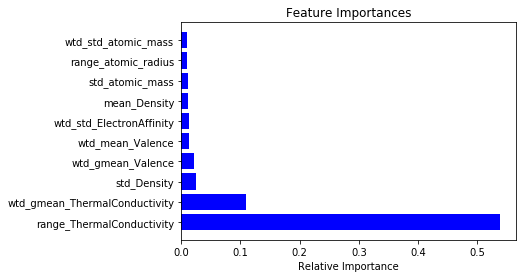

In [4]:
features = sc11.columns
importances = rfst.feature_importances_
indices = np.argsort(importances)[::-1]
indices=indices[0:10]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()